In [1]:
import pandas as pd

data=pd.read_csv("df_calendar.csv" )

#data


# Specify the columns you want to keep
#columns_to_keep = ['datetime','Load']

# Use indexing to select the desired columns
#df = data[columns_to_keep]
# set the 'datetime_column' as the index
#df.set_index('datetime', inplace=True)
data

,datetime,Load,sunrise_hour,sunset_hour,daylight_hours,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos
0,2019-03-21 00:00:00+00:00,352.862799,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.000000,1.000000
1,2019-03-21 01:00:00+00:00,330.444853,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.258819,0.965926
2,2019-03-21 02:00:00+00:00,287.419792,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.500000,0.866025
3,2019-03-21 03:00:00+00:00,258.110368,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.707107,0.707107
4,2019-03-21 04:00:00+00:00,247.745866,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
22003,2021-09-22 19:00:00+00:00,632.235500,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.965926,0.258819
22004,2021-09-22 20:00:00+00:00,612.703162,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000
22005,2021-09-22 21:00:00+00:00,589.574385,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.707107,0.707107
22006,2021-09-22 22:00:00+00:00,561.323968,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.500000,0.866025


In [2]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [3]:
df=data

In [4]:
df.dtypes

datetime           datetime64[ns, UTC]
Load                           float64
sunrise_hour                     int64
sunset_hour                      int64
daylight_hours                   int64
month_sin                      float64
month_cos                      float64
day_of_week_sin                float64
day_of_week_cos                float64
hour_sin                       float64
hour_cos                       float64
dtype: object

In [5]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 4)

In [6]:
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
X = df.drop(labels=[], axis=1)
y = df['Load']

In [7]:
y

datetime
2019-03-21 00:00:00+00:00    352.862799
2019-03-21 01:00:00+00:00    330.444853
2019-03-21 02:00:00+00:00    287.419792
2019-03-21 03:00:00+00:00    258.110368
2019-03-21 04:00:00+00:00    247.745866
                                ...    
2021-09-22 19:00:00+00:00    632.235500
2021-09-22 20:00:00+00:00    612.703162
2021-09-22 21:00:00+00:00    589.574385
2021-09-22 22:00:00+00:00    561.323968
2021-09-22 23:00:00+00:00    522.105758
Name: Load, Length: 22008, dtype: float64

In [8]:
X

,Load,sunrise_hour,sunset_hour,daylight_hours,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos
datetime,,,,,,,,,,
2019-03-21 00:00:00+00:00,352.862799,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.000000,1.000000
2019-03-21 01:00:00+00:00,330.444853,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.258819,0.965926
2019-03-21 02:00:00+00:00,287.419792,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.500000,0.866025
2019-03-21 03:00:00+00:00,258.110368,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.707107,0.707107
2019-03-21 04:00:00+00:00,247.745866,6,18,12,1.0,6.123234e-17,0.433884,-0.900969,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...
2021-09-22 19:00:00+00:00,632.235500,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.965926,0.258819
2021-09-22 20:00:00+00:00,612.703162,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000
2021-09-22 21:00:00+00:00,589.574385,5,17,12,-1.0,-1.836970e-16,0.974928,-0.222521,-0.707107,0.707107


In [9]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [10]:
X_train.index

DatetimeIndex(['2019-03-21 00:00:00+00:00', '2019-03-21 01:00:00+00:00',
               '2019-03-21 02:00:00+00:00', '2019-03-21 03:00:00+00:00',
               '2019-03-21 04:00:00+00:00', '2019-03-21 05:00:00+00:00',
               '2019-03-21 06:00:00+00:00', '2019-03-21 07:00:00+00:00',
               '2019-03-21 08:00:00+00:00', '2019-03-21 09:00:00+00:00',
               ...
               '2021-03-23 05:00:00+00:00', '2021-03-23 06:00:00+00:00',
               '2021-03-23 07:00:00+00:00', '2021-03-23 08:00:00+00:00',
               '2021-03-23 09:00:00+00:00', '2021-03-23 10:00:00+00:00',
               '2021-03-23 11:00:00+00:00', '2021-03-23 12:00:00+00:00',
               '2021-03-23 13:00:00+00:00', '2021-03-23 14:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=17607, freq=None)

In [11]:
X_test[:40]

,Load,sunrise_hour,sunset_hour,daylight_hours,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos
datetime,,,,,,,,,,
2021-03-23 15:00:00+00:00,298.028399,5,18,13,1.0,6.123234e-17,0.781831,0.623490,-7.071068e-01,-7.071068e-01
2021-03-23 16:00:00+00:00,302.942181,5,18,13,1.0,6.123234e-17,0.781831,0.623490,-8.660254e-01,-5.000000e-01
2021-03-23 17:00:00+00:00,310.834565,5,18,13,1.0,6.123234e-17,0.781831,0.623490,-9.659258e-01,-2.588190e-01
2021-03-23 18:00:00+00:00,321.126720,5,18,13,1.0,6.123234e-17,0.781831,0.623490,-1.000000e+00,-1.836970e-16
2021-03-23 19:00:00+00:00,351.975302,5,18,13,1.0,6.123234e-17,0.781831,0.623490,-9.659258e-01,2.588190e-01
2021-03-23 20:00:00+00:00,381.193585,5,18,13,1.0,6.123234e-17,0.781831,0.623490,-8.660254e-01,5.000000e-01
2021-03-23 21:00:00+00:00,372.975475,5,18,13,1.0,6.123234e-17,0.781831,0.623490,-7.071068e-01,7.071068e-01
2021-03-23 22:00:00+00:00,361.653087,5,18,13,1.0,6.123234e-17,0.781831,0.623490,-5.000000e-01,8.660254e-01
2021-03-23 23:00:00+00:00,348.730577,5,18,13,1.0,6.123234e-17,0.781831,0.623490,-2.588190e-01,9.659258e-01


In [12]:
X_test.index

DatetimeIndex(['2021-03-23 15:00:00+00:00', '2021-03-23 16:00:00+00:00',
               '2021-03-23 17:00:00+00:00', '2021-03-23 18:00:00+00:00',
               '2021-03-23 19:00:00+00:00', '2021-03-23 20:00:00+00:00',
               '2021-03-23 21:00:00+00:00', '2021-03-23 22:00:00+00:00',
               '2021-03-23 23:00:00+00:00', '2021-03-24 00:00:00+00:00',
               ...
               '2021-09-22 14:00:00+00:00', '2021-09-22 15:00:00+00:00',
               '2021-09-22 16:00:00+00:00', '2021-09-22 17:00:00+00:00',
               '2021-09-22 18:00:00+00:00', '2021-09-22 19:00:00+00:00',
               '2021-09-22 20:00:00+00:00', '2021-09-22 21:00:00+00:00',
               '2021-09-22 22:00:00+00:00', '2021-09-22 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=4401, freq=None)

<Axes: xlabel='datetime'>

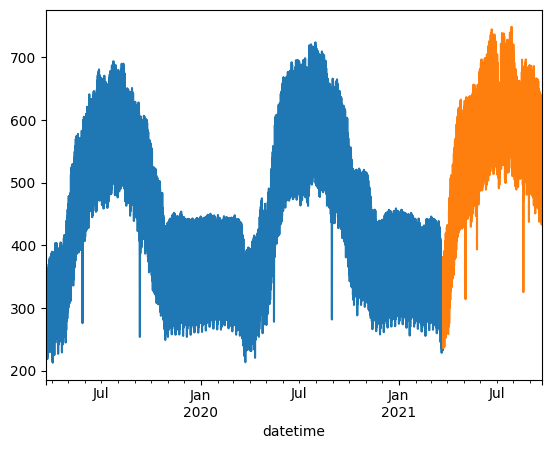

In [13]:
def price2num(x):
    if type(x) == str:
        x = x.strip('$').replace(',', '')
    return float(x)


#function to convert price from string to floats
y_train=y_train.apply(price2num)
y_train.groupby('datetime').mean().plot()
y_test=y_test.apply(price2num)
y_test.groupby('datetime').mean().plot()

In [14]:
print(X_train.shape, X_test.shape)

(17607, 10) (4401, 10)


In [15]:
y_train.shape

(17607,)

In [16]:
from sklearn.preprocessing import MinMaxScaler

f_columns = ['Load', 'sunrise_hour',
             'sunset_hour', 	'daylight_hours' ,	'month_sin' ,
             'month_cos' ,	'day_of_week_sin' 	,'day_of_week_cos',
             'hour_sin' ,	'hour_cos']  # Define a list of column names to be transformed

f_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for feature transformation
t_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for target transformation

f_transformer = f_transformer.fit(X_train[f_columns].to_numpy())  # Fit the feature transformer to the training data
t_transformer = t_transformer.fit(y_train.to_numpy().reshape(-1, 1))  # Fit the target transformer to the training data

X_train.loc[:, f_columns] = f_transformer.transform(X_train[f_columns].to_numpy())  # Apply feature transformation to the training data
y_train = t_transformer.transform(y_train.to_numpy().reshape(-1, 1))  # Apply target transformation to the training data

X_test.loc[:, f_columns] = f_transformer.transform(X_test[f_columns].to_numpy())  # Apply feature transformation to the test data
y_test = t_transformer.transform(y_test.to_numpy().reshape(-1, 1))  # Apply target transformation to the test data

In [17]:
import numpy as np

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [18]:
time_steps = 24  # Set the number of time steps to 24

X_train, y_train = create_dataset(X_train, y_train, time_steps)  # Create the training dataset using the 'create_dataset' function

X_test, y_test = create_dataset(X_test, y_test, time_steps)  # Create the test dataset using the 'create_dataset' function



print(X_train.shape,y_train.shape,X_test.shape,  y_test.shape)

(17583, 24, 10) (17583, 1) (4377, 24, 10) (4377, 1)


In [19]:
import math
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import tensorflow as tf
from keras.callbacks import EarlyStopping


In [20]:


def build_model(num_layers, units, dropout_rates):
    model = keras.Sequential()

    for i in range(num_layers):
        return_sequences = (i != num_layers - 1)  # Set return_sequences=True for all but the last layer

        model.add(layers.LSTM(units=units[i], input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=return_sequences))
        model.add(layers.Dropout(dropout_rates[i]))

    model.add(layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015490817936875056),
        loss='mean_squared_error'
      # , metrics=['mae','mape']
        )
    return model

# Optimized hyperparameters
num_layers = 1
units = [83 ]
dropout_rates = [0.341051263709813]


model = build_model(num_layers, units, dropout_rates)

# Create an instance of EarlyStopping callback
custom_early_stopping = EarlyStopping(
    monitor='val_loss',  # Quantity to monitor for early stopping (validation loss)
    patience=20,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    start_from_epoch=20
)

history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_split=0.2
    ,callbacks=[custom_early_stopping]
   )

Epoch 1/500
440/440 [==============================] - 11s 20ms/step - loss: 0.0132 - val_loss: 0.0023
Epoch 2/500
440/440 [==============================] - 7s 17ms/step - loss: 0.0046 - val_loss: 0.0010
Epoch 3/500
440/440 [==============================] - 7s 17ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 4/500
440/440 [==============================] - 8s 18ms/step - loss: 0.0025 - val_loss: 6.3760e-04
Epoch 5/500
440/440 [==============================] - 7s 16ms/step - loss: 0.0021 - val_loss: 5.6080e-04
Epoch 6/500
440/440 [==============================] - 8s 19ms/step - loss: 0.0017 - val_loss: 4.8859e-04
Epoch 7/500
440/440 [==============================] - 9s 20ms/step - loss: 0.0015 - val_loss: 4.1147e-04
Epoch 8/500
440/440 [==============================] - 7s 16ms/step - loss: 0.0014 - val_loss: 3.2645e-04
Epoch 9/500
440/440 [==============================] - 8s 19ms/step - loss: 0.0012 - val_loss: 6.3454e-04
Epoch 10/500
440/440 [==============================] - 7

In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 83)                31208     
                                                                 
 dropout (Dropout)           (None, 83)                0         
                                                                 
 dense (Dense)               (None, 1)                 84        
                                                                 
Total params: 31292 (122.23 KB)
Trainable params: 31292 (122.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dict_keys(['loss', 'val_loss'])


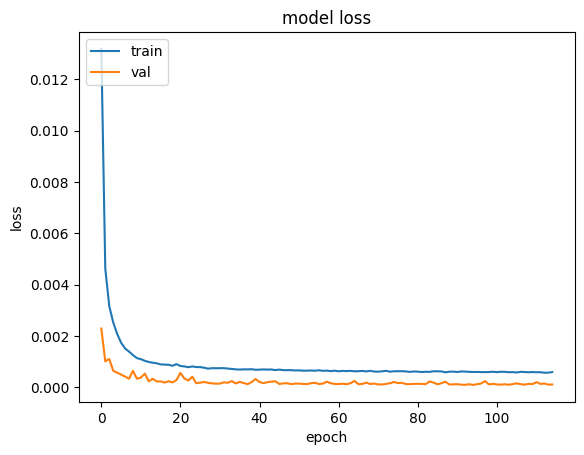

In [22]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



In [23]:
from math import sqrt
from sklearn.metrics import mean_squared_error


y_pred = model.predict(X_test)  #test
y_pred_train = model.predict(X_train) #train
#y_pred_val = model.predict(X_validate)  #val


#inverse
#train inv
y_train_inv = t_transformer.inverse_transform(y_train.reshape(1, -1))  #train actual
y_pred_train_inv = t_transformer.inverse_transform(y_pred_train)  #train

#test inv
y_test_inv = t_transformer.inverse_transform(y_test.reshape((len(y_test), 1)))  #test_actual
y_pred_inv = t_transformer.inverse_transform(y_pred)  #test

#val inv
#y_validate_inv = t_transformer.inverse_transform(y_validate.reshape(-1, 1))
#y_pred_val_inv = t_transformer.inverse_transform(y_pred_val)

550/550 [==============================] - 4s 8ms/step


Train

In [24]:
y_train_inv2 = (y_train_inv.reshape(-1, 1))
#y_train_inv2.shape


# calculate RMSE
rmse = sqrt(mean_squared_error(y_train_inv2, y_pred_train_inv))
print('Train RMSE: %.9f' % rmse)


# calculate MAE
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_train_inv2, y_pred_train_inv)
print('Train MAE: %.9f' % mae)


# calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape= mean_absolute_percentage_error(y_train_inv2, y_pred_train_inv)
print('Train MAPE: %.9f' % mape)

# calculate NRMSE
actual_test=y_train_inv2
Nrmse_test=rmse /(actual_test.max() - actual_test.min())
print('Train NRMSE: %.9f' % Nrmse_test)


from sklearn.metrics import r2_score
r2 = r2_score(y_train_inv2, y_pred_train_inv)
print('R2 score: %.9f' % r2)

Train RMSE: 5.397593190
Train MAE: 3.897278210
Train MAPE: 0.009449786
Train NRMSE: 0.010556641
R2 score: 0.998020957


Test

In [25]:
# calculate RMSE
rmse = sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print('Test RMSE: %.9f' % rmse)


# calculate MAE
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_test_inv, y_pred_inv)
print('Test MAE: %.9f' % mae)


# calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape= mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print('Test MAPE: %.9f' % mape)

# calculate NRMSE
actual_test=y_test_inv
Nrmse_test=rmse /(actual_test.max() - actual_test.min())
print('Test NRMSE: %.9f' % Nrmse_test)


from sklearn.metrics import r2_score
r2 = r2_score(y_test_inv, y_pred_inv)
print('R2 score: %.9f' % r2)


Test RMSE: 14.112591779
Test MAE: 8.149499859
Test MAPE: 0.014744422
Test NRMSE: 0.027628293
R2 score: 0.978109682


In [26]:
# Create a DataFrame with predicted and actual values
df_results = pd.DataFrame({
    #"Datetime": Datetime_column,  # Replace with your datetime column
    "Predicted": y_pred_inv.flatten(),
    "Actual": y_test_inv.flatten()
})

# Print the DataFrame
print(df_results)

       Predicted      Actual
0     298.874542  291.394602
1     296.933502  297.254720
2     307.846710  301.377388
3     314.453888  311.993927
4     350.645142  349.286351
...          ...         ...
4372  648.817139  632.235500
4373  616.883423  612.703162
4374  594.400757  589.574385
4375  557.722900  561.323968
4376  521.489746  522.105758

[4377 rows x 2 columns]


Text(0.5, 1.0, 'Load forecasting')

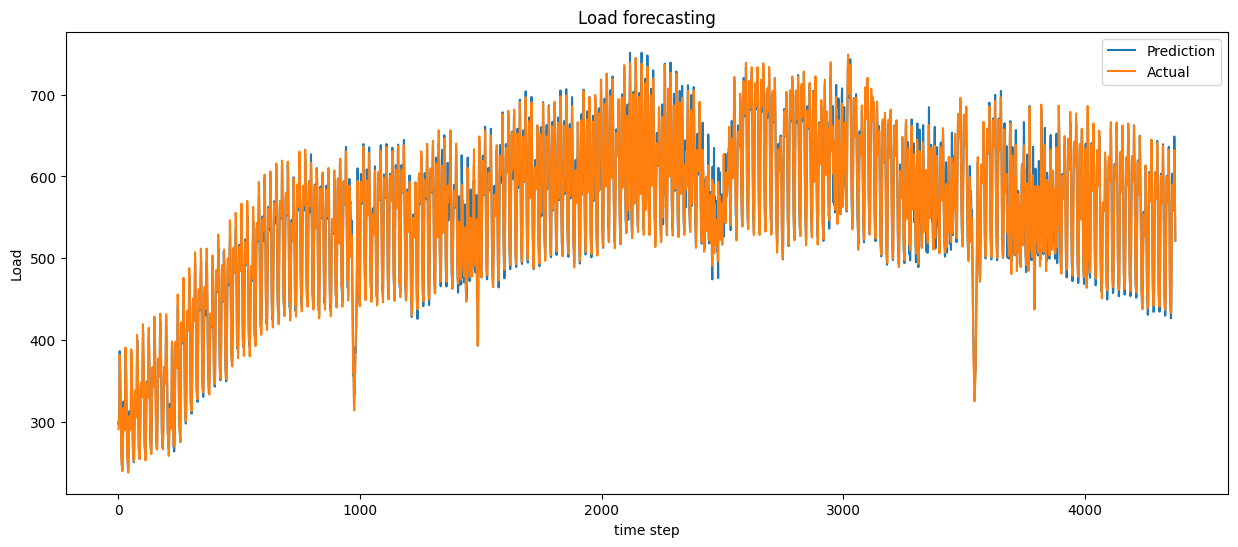

In [27]:
plt.figure(figsize=(15,6))

plt.plot(y_pred_inv, label="Prediction" )
plt.plot(y_test_inv, label="Actual")
plt.legend()
plt.ylabel('Load')
plt.xlabel('time step' )
#plt.title ("Russell 2000 Adj close Price prediction- with MAE {:10.4f}".format(mae))
plt.title ('Load forecasting')

#plt.xlim(
#  xmin=-10, xmax=2200
#)
#plt.show()


#plt.savefig("ALLSKY_SRF_ALB.svg")
#plt.savefig("ALLSKY_SRF_ALB.png", format="png", dpi=300)
#plt.savefig('ALLSKY_SRF_ALB.eps', format='eps')




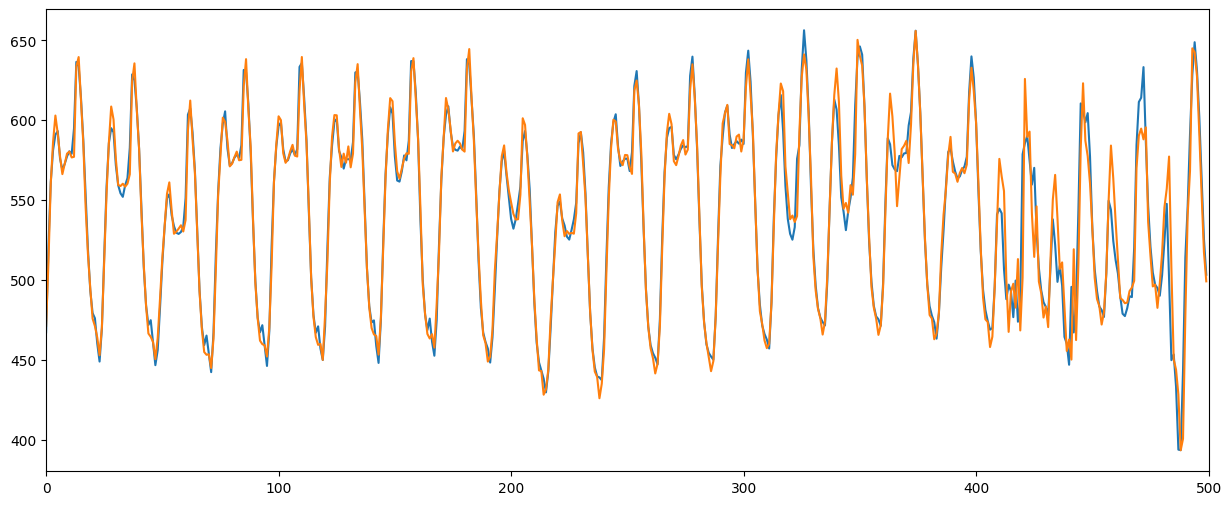

In [28]:
#zoom in spikes


plt.figure(figsize=(15,6))

plt.plot(y_test_inv[1000:1500])
plt.plot(y_pred_inv[1000:1500])
plt.xlim(
  xmin=0, xmax=500
)
#plt.show()




plt.savefig("SZA_zoomin.svg")
plt.savefig("SZA_zoomin.png", format="png", dpi=300)
plt.savefig('SZA_zoomin.eps', format='eps')
